# Week 4 Individual Assignment
For this week's assignment I'll be building on past assignments. I'll be looking at other variables related to transportation in Gauteng. Yasmina and I are interested in gathering and plotting the information about population groups' use of BRT, perception of BRT, and main reason to use BRT. I also want to practice what we learned in last week's lab so I'll be using Geopandas to map plots

## Getting Started

### Import Libraries

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Import my data

In [2]:
qol17 = pd.read_csv('qols-v-2017-2018-week4_edits.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
wards = gpd.read_file('MDB_Wards_2020_data.zip', encoding="utf-8")

### Get an overview of my data

In [4]:
qol17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24889 entries, 0 to 24888
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   resp_id                           24889 non-null  int64  
 1   ward                              24889 non-null  int64  
 2   munic                             24889 non-null  object 
 3   munic_recode                      24889 non-null  object 
 4   region                            24889 non-null  object 
 5   ea_code                           24889 non-null  int64  
 6   sp_code                           24889 non-null  int64  
 7   sp_name                           24889 non-null  object 
 8   mp_code                           24889 non-null  int64  
 9   mp_name                           24889 non-null  object 
 10  duration                          24889 non-null  float64
 11  date                              24889 non-null  object 
 12  dwel

In [5]:
wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         529 non-null    int64   
 1   Province    529 non-null    object  
 2   Municipali  529 non-null    object  
 3   CAT_B       529 non-null    object  
 4   WardNo      529 non-null    int64   
 5   District    529 non-null    object  
 6   DistrictCo  529 non-null    object  
 7   Date        529 non-null    object  
 8   WardID      529 non-null    object  
 9   WardLabel   529 non-null    object  
 10  Shape__Are  529 non-null    float64 
 11  Shape__Len  529 non-null    float64 
 12  geometry    529 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(8)
memory usage: 53.9+ KB


## Data Merge

I know that I want to merge my two datasets. Last week when I tried this, the two datasets successfully merged but a portion of my data was "lost" along the way (Rand City West). I am going to attempt to convert the column from objects to integers using a different line of code

### Convert WardID column type

In [6]:
pd.to_numeric(wards['WardID'])

0      79800001
1      79800002
2      79800003
3      79800004
4      79800005
         ...   
524    74805031
525    74805032
526    74805033
527    74805034
528    74805035
Name: WardID, Length: 529, dtype: int64

In [7]:
wards["WardID"]=pd.to_numeric(wards['WardID']).astype(int)

This is a code to convert the WardID from an object to an integer

In [8]:
wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         529 non-null    int64   
 1   Province    529 non-null    object  
 2   Municipali  529 non-null    object  
 3   CAT_B       529 non-null    object  
 4   WardNo      529 non-null    int64   
 5   District    529 non-null    object  
 6   DistrictCo  529 non-null    object  
 7   Date        529 non-null    object  
 8   WardID      529 non-null    int64   
 9   WardLabel   529 non-null    object  
 10  Shape__Are  529 non-null    float64 
 11  Shape__Len  529 non-null    float64 
 12  geometry    529 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(7)
memory usage: 53.9+ KB


It worked! My WardID column is now listed as an integer. Now I want to ensure I didn't lose any data and have all 529 wards

In [9]:
wards['WardID'].value_counts()

79800001    1
79700107    1
74201009    1
74201008    1
74201007    1
           ..
79900037    1
79900036    1
79900035    1
79900034    1
74805035    1
Name: WardID, Length: 529, dtype: int64

By running value counts for my WardID column, I can see that I have 529 wards listed, the correct number of wards for the Gauteng province

In [10]:
qol17['ward'].value_counts()

79800100    174
79800062     99
79700100     93
79900081     86
79700002     80
           ... 
74202007     31
74801003     31
74801021     30
74202012     30
74801039     29
Name: ward, Length: 529, dtype: int64

### Plot the info!

I wanted to run a value counts for the Qol17 dataset as well to ensure that it also had 529 values for WardID

Text(0.5, 1.0, 'Gauteng Districts')

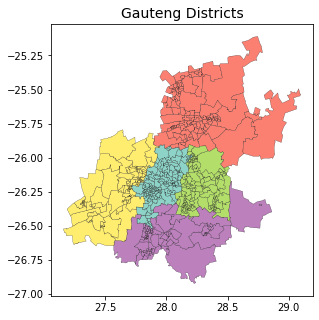

In [11]:
wards.plot(figsize=(5,5),
                   column='District',
           cmap='Set3',
                   edgecolor='black',
                   linewidth=0.2,
                   legend=False,
                  )
plt.title('Gauteng Districts', fontsize=14)

This is a plot of just the wards data (pre-merge) and all wards are there!

### Rename Column Before Data Merge

I want to merge the two datasets on the ward column, but I need to change the name of the qol17 "ward" column to "WardID"

In [12]:
qol17 = qol17.rename(columns={'ward': 'WardID'})

I want to double check that the column was successfully renamed, so I will run a .head

In [13]:
qol17.head(2)

,resp_id,WardID,munic,munic_recode,region,ea_code,sp_code,sp_name,mp_code,mp_name,...,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q11_14_unemployment_status,Q12_03_day,Q12_04_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income
0,7391,74201002,Emfuleni,Emfuleni,Sedibeng,76010738,760004018,Sebokeng Hostels,760004,Sebokeng,...,Strongly disagree,Strongly disagree,Agree,NaN,Very unsafe,Very unsafe,41,40-44,No,R6 401 - R12 800
1,7392,74201017,Emfuleni,Emfuleni,Sedibeng,76010859,760004018,Sebokeng Hostels,760004,Sebokeng,...,Strongly disagree,Neither agree nor disagree,Agree,Yes,Very unsafe,Very unsafe,42,40-44,No,R1 601 - R3 200


In [14]:
qol17['WardID'].value_counts()

79800100    174
79800062     99
79700100     93
79900081     86
79700002     80
           ... 
74202007     31
74801003     31
74801021     30
74202012     30
74801039     29
Name: WardID, Length: 529, dtype: int64

By running a value count, I can see that the list still has 529 wards. I believe I should be able to merge the two datasets without losing information. Let's give it a go!

### Merge the data

In [15]:
wards = wards.merge(qol17, on='WardID')

I want to see if my dataset merged successfully and see if I'm still missing data from Rand City West. (Fingers crossed it worked!)

Text(0.5, 1.0, 'Gauteng Districts')

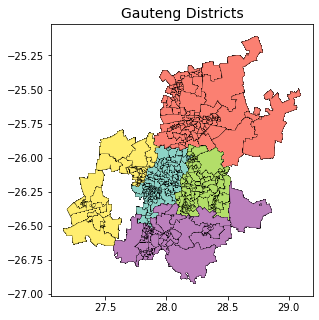

In [16]:
wards.plot(figsize=(5,5),
                   column='District',
           cmap='Set3',
                   edgecolor='black',
                   linewidth=0.2,
                   legend=False,
                  )
plt.title('Gauteng Districts', fontsize=14)

I plotted the data and it seems I'm still missing the data for this one specific area. I'm going to run a value count again for the WardID column

In [17]:
wards['WardID'].value_counts()

79800100    174
79800062     99
79700100     93
79900081     86
79700002     80
           ... 
74203001     31
74202001     31
74801021     30
74202012     30
74801039     29
Name: WardID, Length: 494, dtype: int64

My wards went from 529 (the number of wards in Gauteng) to 494 -- so I am clearly losing an entire section of wards 

**Is there a way to remedy this?**

I'm going to move forward with this dataset but with the caveat that **there is data missing**

## Rename Columns

I want to further explore the 2017-2018 Quality of Life Survey, specifically looking at other factors in transportation that I wasn't able to get to last time. But first I want to rename some columns so they are easier to understand. I have based my naming on the question details from the QoL survey

In [18]:
wards.columns.to_list()

['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'Date',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'ea_code',
 'sp_code',
 'sp_name',
 'mp_code',
 'mp_name',
 'duration',
 'date',
 'dwelling_count',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'Q2_11_street_lights',
 'Q3_02_country',
 'Q3_10_Future',
 'Q4_03_community',
 'Q5_01_frequent_trip',
 'Q5_01_recode',
 'Q5_02_non_movement',
 'Q5_02_01_trip',
 'Q5_03_destination',
 'Q5_03_1',
 'Q5_03_2',
 'Q5_03_2_codes',
 'Q5_03_3',
 'Q5_03_3_codes',
 'Q5_03_4',
 'Q5_03_4_codes',
 'Q5_04_time',
 'Q5_05_time_destination',
 'Q5_06_1',
 'Q5_06_2',
 'Q5_06_3',
 'Q5_06_4',
 'Q5_06_5',
 'Q5_06_6',
 'Q5_06_7',
 'Q5_06_8',
 'Q5_06_9',
 'Q5_06_10',
 'Q5_06_11',
 'Q5_06_12',
 'Q5_06_13',
 'Q5_06_14',
 'Q5_06_15',
 'Q5_07_Transp_Longdistance',
 'Q5_08_alternative_transport',
 'Q5_09_longest_tra

In [19]:
wards=wards.rename(columns={
'Q5_02_01_trip':'Q5_02_01_trip_purpose',
'Q5_03_1': 'Q5_03_1_province',
 'Q5_03_2': 'Q5_03_2_municipali',
 'Q5_03_3': 'Q5_03_3_main_place',
 'Q5_03_4': 'Q5_03_4_subplace',
'Q5_06_1': 'Q5_06_1_freq_trip_walk',
 'Q5_06_2': 'Q5_06_2_freq_trip_bike',
 'Q5_06_3': 'Q5_06_3_freq_trip_motorbike',
 'Q5_06_4': 'Q5_06_4_freq_trip_car_driver',
 'Q5_06_5': 'Q5_06_5_freq_trip_car_passeng',
 'Q5_06_6': 'Q5_06_6_freq_trip_car_liftclub',
 'Q5_06_7': 'Q5_06_7_freq_trip_minibus',
 'Q5_06_8': 'Q5_06_8_freq_trip_train',
 'Q5_06_9': 'Q5_06_9_freq_trip_gautrain',
 'Q5_06_10': 'Q5_06_10_freq_trip_BRT',
 'Q5_06_11': 'Q5_06_11_freq_trip_Bus_other',
 'Q5_06_12': 'Q5_06_12_freq_trip_school_bus',
 'Q5_06_13': 'Q5_06_13_freq_trip_taxi_other',
 'Q5_06_14': 'Q5_06_14_freq_trip_animal_animalcart',
 'Q5_06_15': 'Q5_06_15_freq_trip_other',
     'Q5_11_BRT':  'Q5_11_BRT_use',
    'Q8_06_idp': 'Q8_06_integrated_dev_plan',
    'Q9_02_infl_dev': 'Q9_02_influence_dev',
    'Q9_12_foreigners': 'Q9_12_foreigners_violenc',
    'Q12_03_day': 'Q12_03_safety_day',
 'Q12_04_night': 'Q12_04_safety_night',
})

I want to verify that my columns have updated so I will run a .head

In [20]:
wards.head(2)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q11_14_unemployment_status,Q12_03_safety_day,Q12_04_safety_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly disagree,Strongly disagree,Agree,NaN,Bit unsafe,Very unsafe,35,35-39,No,R1 601 - R3 200
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly disagree,Strongly disagree,Agree,Yes,Very unsafe,Very unsafe,28,25-29,No,R6 401 - R12 800


I can see that the columns have been successfully renamed

## Data Exploration 

I want to take a look at some of the variables that I didn't explore last time

### Create a dataframe for motivations for using BRT

The first variable I'll explore is main reasons for using BRT

In [21]:
wards['Q5_13_why_use_BRT'].value_counts()

Cost                                                    822
Reliability                                             321
Other                                                   280
Stops close to destination (eg. work& school& shops)    274
Safety (road safety& accidents)                         257
Stops close to home                                     238
Fast                                                    221
Security (from crime)                                    43
Name: Q5_13_why_use_BRT, dtype: int64

In [22]:
# i want to save this as a dataframe

why_BRT = wards['Q5_13_why_use_BRT'].value_counts()

In [23]:
# convert to a dataframe so we can manipulate it

why_BRT = why_BRT.reset_index()

In [24]:
why_BRT

,index,Q5_13_why_use_BRT
0,Cost,822
1,Reliability,321
2,Other,280
3,Stops close to destination (eg. work& school& ...,274
4,Safety (road safety& accidents),257
5,Stops close to home,238
6,Fast,221
7,Security (from crime),43


In [25]:
# rename the columns

why_BRT.columns = ['Q5_13_why_use_BRT', 'Count']

### Creating a pie chart of motivations for BRT use

I want to make a pie chart of the percentages of people who use BRT

Text(0.5, 1.0, 'Motivations for using BRT')

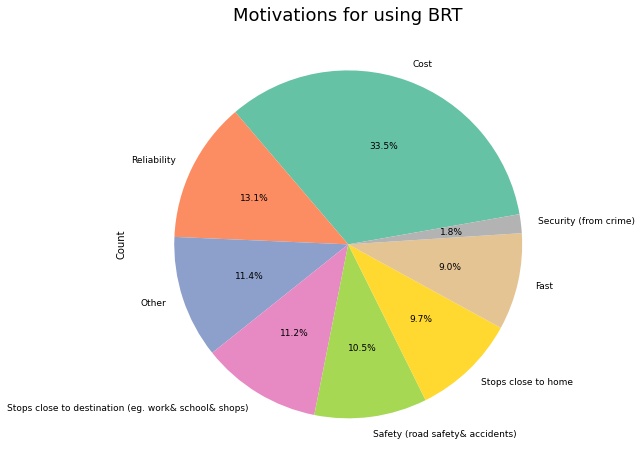

In [26]:
plt.figure(figsize=(21,8))
ax1 = plt.subplot(121, aspect = 'equal')
why_BRT.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=why_BRT['Q5_13_why_use_BRT'],
             legend=False, fontsize=9)
plt.title("Motivations for using BRT", fontsize = 18)

It's a pretty even spread of motivations for using BRT though over 33% of respondents mention their motivation for using BRT is the cost.

## Exploring the relationship between population group and transportation

I want to explore the relationship between different populations and BRT use. To do so, I first want to see the number of each population group in the sample. I can use crosstab to see the breakdown of population groups in each ward. 

### Using cross tab

In [27]:
wards_pop_group = pd.crosstab(index=wards['WardID'],
                        columns=wards['A1_Pop_group'],
                       margins=True,
                       margins_name='Total Number')

In [28]:
wards_pop_group

A1_Pop_group,African,Coloured,Indian/Asian,Other,White,Total Number
WardID,,,,,,
74201001,11,2,0,0,23,36
74201002,36,1,0,0,0,37
74201003,28,2,0,0,4,34
74201004,24,0,0,0,10,34
74201005,13,1,0,0,17,31
...,...,...,...,...,...,...
79900104,36,1,0,0,0,37
79900105,27,1,0,0,3,31
79900106,37,0,0,1,0,38


### Create a new dataframe

I want to create a dataframe for reach population group so that I can then map their BRT use and motivations for using BRT. I will be querying the wards data by groups listed in A1_Pop_group and saving them each as a new variable. I will then map these questions. I'm not sure if there's a better way to do this, as it's pretty tedious, but I believe it will work!

### Querying the Wards data

In [29]:
pop_group_African = wards.query("A1_Pop_group == 'African'")

I want to check that my query worked 

In [30]:
pop_group_African

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q11_14_unemployment_status,Q12_03_safety_day,Q12_04_safety_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly disagree,Strongly disagree,Agree,NaN,Bit unsafe,Very unsafe,35,35-39,No,R1 601 - R3 200
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly disagree,Strongly disagree,Agree,Yes,Very unsafe,Very unsafe,28,25-29,No,R6 401 - R12 800
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Neither agree nor disagree,Disagree,Neither agree nor disagree,No,Fairly safe,Bit unsafe,62,60-64,No,R1 601 - R3 200
3,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Neither agree nor disagree,Strongly disagree,Agree,NaN,Neither safe nor unsafe,Very unsafe,25,25-29,No,R3 201 - R6 400
4,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Disagree,Disagree,Disagree,Yes,Fairly safe,Fairly safe,47,45-49,No,Respondent refused
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Agree,Strongly agree,Disagree,Yes,Very safe,Fairly safe,23,20-24,No,R3 201 - R6 400
23602,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Strongly disagree,Disagree,Disagree,NaN,Very safe,Very safe,44,40-44,No,R801 - R1 600
23603,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Disagree,Strongly disagree,Strongly agree,Yes,Fairly safe,Very unsafe,26,25-29,No,Respondent refused
23604,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Disagree,Disagree,Agree,NaN,Very safe,Very safe,37,35-39,No,R6 401 - R12 800


querying my data and saving it as a new variable was successful! So I will continue this process for the remaining population groups as listed in the QoL survey

In [31]:
pop_group_Coloured = wards.query("A1_Pop_group == 'Coloured'")

pop_group_Coloured

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q11_14_unemployment_status,Q12_03_safety_day,Q12_04_safety_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income
272,2900,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,5,City of Johannesburg,JHB,2020-11-26,79800005,JHB_5,...,Neither agree nor disagree,Disagree,Agree,No,Fairly safe,Bit unsafe,31,30-34,No,R1 601 - R3 200
324,2901,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,6,City of Johannesburg,JHB,2020-11-26,79800006,JHB_6,...,Disagree,Strongly disagree,Strongly agree,NaN,Fairly safe,Neither safe nor unsafe,52,50-54,No,R3 201 - R6 400
364,2902,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,7,City of Johannesburg,JHB,2020-11-26,79800007,JHB_7,...,Neither agree nor disagree,Disagree,Agree,NaN,Fairly safe,Very unsafe,21,20-24,No,R3 201 - R6 400
367,2902,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,7,City of Johannesburg,JHB,2020-11-26,79800007,JHB_7,...,Disagree,Disagree,Strongly agree,No,Very unsafe,Very unsafe,54,50-54,No,R6 401 - R12 800
368,2902,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,7,City of Johannesburg,JHB,2020-11-26,79800007,JHB_7,...,Agree,Strongly disagree,Strongly agree,No,Fairly safe,Neither safe nor unsafe,27,25-29,No,R12 801 - R19 200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,3379,Gauteng,Mogale City Local Municipality,GT481,29,West Rand,DC48,2020-11-26,74801029,GT481_29,...,Strongly disagree,Strongly disagree,Strongly agree,Yes,Very safe,Very unsafe,53,50-54,No,Respondent refused
23328,3382,Gauteng,Mogale City Local Municipality,GT481,32,West Rand,DC48,2020-11-26,74801032,GT481_32,...,Disagree,Disagree,Disagree,NaN,Very safe,Bit unsafe,44,40-44,No,R3 201 - R6 400
23339,3382,Gauteng,Mogale City Local Municipality,GT481,32,West Rand,DC48,2020-11-26,74801032,GT481_32,...,Disagree,Disagree,Agree,NaN,Very safe,Very unsafe,26,25-29,No,Respondent refused
23545,3388,Gauteng,Mogale City Local Municipality,GT481,38,West Rand,DC48,2020-11-26,74801038,GT481_38,...,Disagree,Strongly disagree,Strongly agree,NaN,Fairly safe,Very unsafe,52,50-54,No,R6 401 - R12 800


In [32]:
pop_group_IndianAsian = wards.query("A1_Pop_group == 'Indian/Asian'")

pop_group_IndianAsian

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q11_14_unemployment_status,Q12_03_safety_day,Q12_04_safety_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income
394,2903,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,8,City of Johannesburg,JHB,2020-11-26,79800008,JHB_8,...,Disagree,Agree,Agree,No,Fairly safe,Bit unsafe,54,50-54,No,R1 601 - R3 200
401,2903,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,8,City of Johannesburg,JHB,2020-11-26,79800008,JHB_8,...,Neither agree nor disagree,Strongly disagree,Agree,No,Fairly safe,Neither safe nor unsafe,23,20-24,No,R19 201 - R25 600
405,2903,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,8,City of Johannesburg,JHB,2020-11-26,79800008,JHB_8,...,Agree,Disagree,Agree,No,Very unsafe,Very unsafe,76,65+,No,R1 601 - R3 200
409,2903,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,8,City of Johannesburg,JHB,2020-11-26,79800008,JHB_8,...,Disagree,Disagree,Agree,No,Very safe,Very unsafe,56,55-59,No,R3 201 - R6 400
410,2903,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,8,City of Johannesburg,JHB,2020-11-26,79800008,JHB_8,...,Disagree,Disagree,Neither agree nor disagree,NaN,Fairly safe,Bit unsafe,35,35-39,No,R12 801 - R19 200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,3353,Gauteng,Mogale City Local Municipality,GT481,3,West Rand,DC48,2020-11-26,74801003,GT481_3,...,Strongly agree,Disagree,Strongly disagree,No,Fairly safe,Fairly safe,33,30-34,No,Respondent refused
22851,3368,Gauteng,Mogale City Local Municipality,GT481,18,West Rand,DC48,2020-11-26,74801018,GT481_18,...,Neither agree nor disagree,Strongly disagree,Agree,NaN,Very safe,Bit unsafe,47,45-49,No,R25 601 - R38 400
22973,3372,Gauteng,Mogale City Local Municipality,GT481,22,West Rand,DC48,2020-11-26,74801022,GT481_22,...,Disagree,Disagree,Neither agree nor disagree,No,Very safe,Very unsafe,59,55-59,No,Respondent refused
23224,3379,Gauteng,Mogale City Local Municipality,GT481,29,West Rand,DC48,2020-11-26,74801029,GT481_29,...,Neither agree nor disagree,Disagree,Neither agree nor disagree,No,Very safe,Bit unsafe,62,60-64,No,Respondent refused


In [33]:
pop_group_Other = wards.query("A1_Pop_group == 'Other'")

pop_group_Other

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q11_14_unemployment_status,Q12_03_safety_day,Q12_04_safety_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income
17,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Agree,Neither agree nor disagree,Neither agree nor disagree,No,Fairly safe,Fairly safe,32,30-34,"Yes, full time",Respondent refused
609,2907,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,12,City of Johannesburg,JHB,2020-11-26,79800012,JHB_12,...,Disagree,Disagree,Agree,Yes,Very safe,Very safe,51,50-54,No,R401 - R800
1233,2918,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,23,City of Johannesburg,JHB,2020-11-26,79800023,JHB_23,...,Disagree,Disagree,Neither agree nor disagree,NaN,Fairly safe,Very unsafe,49,45-49,No,Respondent refused
1238,2918,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,23,City of Johannesburg,JHB,2020-11-26,79800023,JHB_23,...,Neither agree nor disagree,Disagree,Agree,NaN,Bit unsafe,Bit unsafe,44,40-44,No,R25 601 - R38 400
1265,2918,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,23,City of Johannesburg,JHB,2020-11-26,79800023,JHB_23,...,Neither agree nor disagree,Disagree,Neither agree nor disagree,No,Fairly safe,Bit unsafe,45,45-49,No,Respondent refused
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22939,3371,Gauteng,Mogale City Local Municipality,GT481,21,West Rand,DC48,2020-11-26,74801021,GT481_21,...,Neither agree nor disagree,Disagree,Agree,NaN,Very safe,Very safe,45,45-49,No,Respondent refused
23010,3373,Gauteng,Mogale City Local Municipality,GT481,23,West Rand,DC48,2020-11-26,74801023,GT481_23,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Yes,Bit unsafe,Very unsafe,22,20-24,No,R801 - R1 600
23247,3379,Gauteng,Mogale City Local Municipality,GT481,29,West Rand,DC48,2020-11-26,74801029,GT481_29,...,Disagree,Disagree,Agree,NaN,Fairly safe,Very unsafe,30,30-34,No,Respondent refused
23248,3379,Gauteng,Mogale City Local Municipality,GT481,29,West Rand,DC48,2020-11-26,74801029,GT481_29,...,Disagree,Disagree,Agree,NaN,Fairly safe,Very unsafe,24,20-24,No,Respondent refused


In [34]:
pop_group_White = wards.query("A1_Pop_group == 'White'")

In [35]:
pop_group_White

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q11_14_unemployment_status,Q12_03_safety_day,Q12_04_safety_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income
1232,2918,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,23,City of Johannesburg,JHB,2020-11-26,79800023,JHB_23,...,Disagree,Strongly disagree,Agree,NaN,Fairly safe,Bit unsafe,39,35-39,No,R38 401 - R51 200
1234,2918,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,23,City of Johannesburg,JHB,2020-11-26,79800023,JHB_23,...,Agree,Disagree,Strongly agree,No,Very safe,Very safe,55,55-59,No,Respondent refused
1239,2918,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,23,City of Johannesburg,JHB,2020-11-26,79800023,JHB_23,...,Agree,Disagree,Agree,NaN,Bit unsafe,Bit unsafe,41,40-44,No,Respondent refused
1240,2918,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,23,City of Johannesburg,JHB,2020-11-26,79800023,JHB_23,...,Strongly agree,Strongly disagree,Strongly disagree,NaN,Bit unsafe,Very unsafe,26,25-29,No,Respondent refused
1242,2918,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,23,City of Johannesburg,JHB,2020-11-26,79800023,JHB_23,...,Agree,Strongly disagree,Agree,NaN,Very safe,Fairly safe,45,45-49,No,R19 201 - R25 600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23574,3388,Gauteng,Mogale City Local Municipality,GT481,38,West Rand,DC48,2020-11-26,74801038,GT481_38,...,Strongly disagree,Strongly disagree,Strongly agree,No,Very safe,Very unsafe,73,65+,No,Respondent refused
23575,3388,Gauteng,Mogale City Local Municipality,GT481,38,West Rand,DC48,2020-11-26,74801038,GT481_38,...,Strongly disagree,Strongly disagree,Strongly agree,NaN,Very safe,Very unsafe,55,55-59,No,Respondent refused
23576,3388,Gauteng,Mogale City Local Municipality,GT481,38,West Rand,DC48,2020-11-26,74801038,GT481_38,...,Agree,Disagree,Disagree,No,Very safe,Very unsafe,19,18-19,No,Respondent refused
23584,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Agree,Disagree,Neither agree nor disagree,NaN,Very safe,Very safe,21,20-24,"Yes, part time",R3 201 - R6 400


I created geodataframes for *each* population group so that I can map responses to the same questions for each group. I will start by exploring BRT use

### BRT Use by population group

I will use the datasets I just created to explore the breakdown of BRT use by population group. I will create a new data table for BRT use for each population group

In [36]:
# Save this as a new dataframe so we can manipulate it
white_BRT_use = pop_group_White['Q5_11_BRT_use'].value_counts()

white_BRT_use = white_BRT_use.reset_index()

# I know that the column names will shift so I'm going to rename them now
white_BRT_use.columns = ['Q5_11_BRT_use', 'Count']

# I want to see how it's displayed
white_BRT_use


,Q5_11_BRT_use,Count
0,Never,2260
1,Every few months,59
2,A few times a month,47
3,Once or twice a week,15
4,Most days,9


I'm going to repeat this code sequence for all the groups in A1_Pop_group

In [37]:
# Save this as a new dataframe
other_BRT_use = pop_group_Other['Q5_11_BRT_use'].value_counts()

other_BRT_use = other_BRT_use.reset_index()

# I know that the column names will shift so I'm going to rename them now
other_BRT_use.columns = ['Q5_11_BRT_use', 'Count']

# I want to see how it's displayed
other_BRT_use

,Q5_11_BRT_use,Count
0,Never,73
1,Every few months,4
2,A few times a month,3


In [38]:
# Make a new dataframe
IndianAsian_BRT_use = pop_group_IndianAsian['Q5_11_BRT_use'].value_counts()

IndianAsian_BRT_use = IndianAsian_BRT_use.reset_index()

# I know that the column names will shift so I'm going to rename them now
IndianAsian_BRT_use.columns = ['Q5_11_BRT_use', 'Count']

# I want to see how it's displayed
IndianAsian_BRT_use

,Q5_11_BRT_use,Count
0,Never,311
1,Every few months,14
2,A few times a month,10
3,Once or twice a week,5
4,Most days,2


In [39]:

# Make a new dataframe
Coloured_BRT_use = pop_group_Coloured['Q5_11_BRT_use'].value_counts()

Coloured_BRT_use = Coloured_BRT_use.reset_index()

# I know that the column names will shift so I'm going to rename them now
Coloured_BRT_use.columns = ['Q5_11_BRT_use', 'Count']

# I want to see how it's displayed
Coloured_BRT_use

,Q5_11_BRT_use,Count
0,Never,696
1,A few times a month,39
2,Every few months,32
3,Once or twice a week,16
4,Most days,13


In [40]:
# Make a new dataframe
African_BRT_use = pop_group_African['Q5_11_BRT_use'].value_counts()

African_BRT_use = African_BRT_use.reset_index()

# I know that the column names will shift so I'm going to rename them now
African_BRT_use.columns = ['Q5_11_BRT_use', 'Count']

# I want to see how it's displayed
African_BRT_use

,Q5_11_BRT_use,Count
0,Never,16894
1,A few times a month,761
2,Every few months,715
3,Most days,416
4,Once or twice a week,296


I noticed that the "other" group did not have every option listed, only 0-2. I want to add the other 2 options to the table so that when I plot them, they all have the same legends.

In [41]:
# Save this as a new dataframe
other_BRT_use = pop_group_Other['Q5_11_BRT_use'].value_counts()

other_BRT_use = other_BRT_use.reset_index()

# I know that the column names will shift so I'm going to rename them now
other_BRT_use.columns = ['Q5_11_BRT_use', 'Count']

# I want to add two additional rows
other_BRT_use.loc[len(other_BRT_use.index)] = ['Most days', 0]

other_BRT_use.loc[len(other_BRT_use.index)] = ['Once or twice a week', 0]

# I want to see how it's displayed
other_BRT_use

,Q5_11_BRT_use,Count
0,Never,73
1,Every few months,4
2,A few times a month,3
3,Most days,0
4,Once or twice a week,0


#### Yet another pie chart

I want to create side by side pie charts of each racial group. I tried to find code to list 5 pie charts in the same cell but wasn't successful. Instead, I figured I could plot two pie charts side by side and add a fifth one and display them all in the same cell

<Figure size 432x288 with 0 Axes>

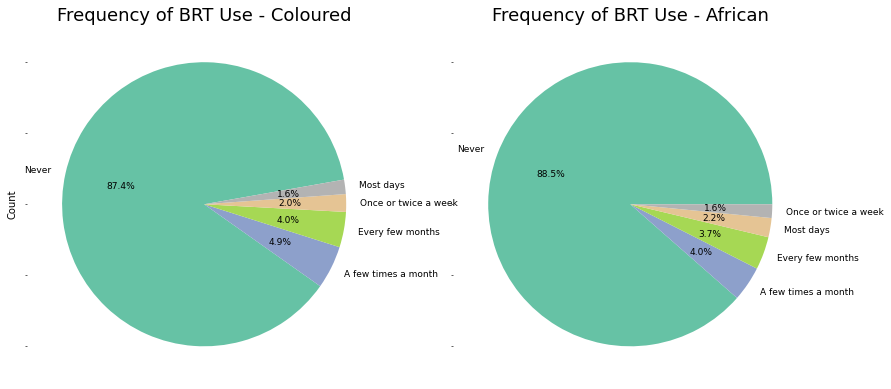

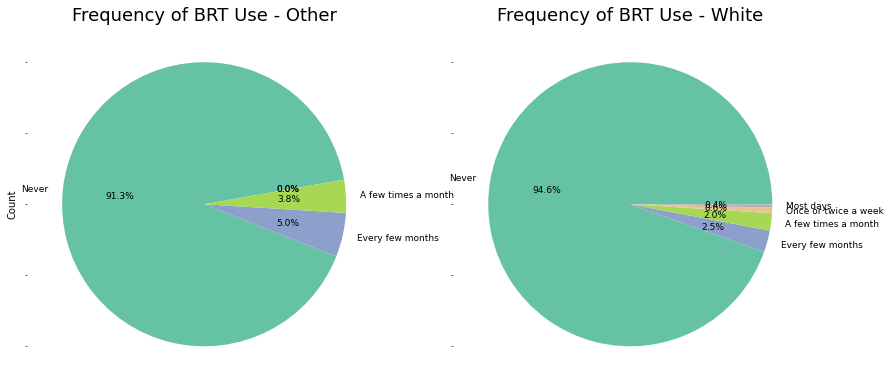

<Figure size 432x288 with 0 Axes>

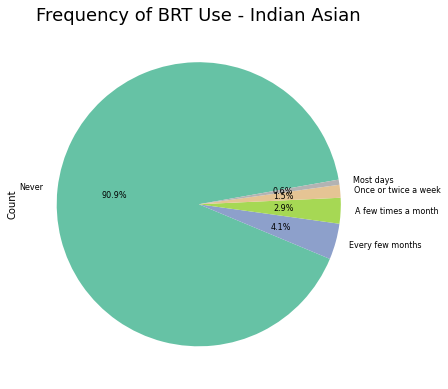

In [42]:
plt.figure(0)
# Create first chart here.

# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(14, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

Coloured_BRT_use.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=Coloured_BRT_use['Q5_11_BRT_use'],
             legend=False, fontsize=9)
ax1.set_title("Frequency of BRT Use - Coloured", fontsize = 18)

African_BRT_use.plot(kind='pie', y = 'Count', ax=ax2, autopct = '%1.1f%%',
                     startangle=0,
             shadow=False,
             cmap='Set2',
             labels=African_BRT_use['Q5_11_BRT_use'],
             legend=False, fontsize=9)
ax2.set_title("Frequency of BRT Use - African", fontsize = 18)


plt.figure(1)

# Create second chart here.

# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(14, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

other_BRT_use.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=other_BRT_use['Q5_11_BRT_use'],
             legend=False, fontsize=9)
ax1.set_title("Frequency of BRT Use - Other", fontsize = 18)

white_BRT_use.plot(kind='pie', y = 'Count', ax=ax2, autopct = '%1.1f%%', labeldistance=1.1,
                     startangle=0,
             shadow=False,
             cmap='Set2',
             labels=white_BRT_use['Q5_11_BRT_use'],
             legend=False, fontsize=9)
ax2.set_title("Frequency of BRT Use - White", fontsize = 18)

plt.figure(3)
# Create third chart here.
plt.figure(figsize=(14,12))
ax1 = plt.subplot(121, aspect = 'equal')
IndianAsian_BRT_use.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=IndianAsian_BRT_use['Q5_11_BRT_use'],
             legend=False, fontsize=8)
plt.title("Frequency of BRT Use - Indian Asian", fontsize = 18)

plt.show() #show all figures

In looking at these pie charts, it is evident that the majority of respondents in each population group never use BRT. I do want to see each population group's motivations for using BRT. I had explored this earlier but for the whole dataset. Yasmina and I agreed it would be helpful to have this information for each population group

## Motivations for Using BRT

Now that I've seen how frequently each population group uses BRT, I'd like to see motivations for using BRT by population group. I'm not sure if there's a less tedious way to create these dataframes but I will create a new dataframe for each population group, this time examining "why BRT?"

In [43]:
# Save this as a new dataframe so we can manipulate it
why_BRT_white = pop_group_White['Q5_13_why_use_BRT'].value_counts()

why_BRT_white = why_BRT_white.reset_index()

# I know that the column names will shift so I'm going to rename them now
why_BRT_white.columns = ['Q5_13_why_use_BRT', 'Count']

# I want to see how it's displayed
why_BRT_white

,Q5_13_why_use_BRT,Count
0,Cost,39
1,Reliability,25
2,Other,20
3,Safety (road safety& accidents),15
4,Stops close to destination (eg. work& school& ...,14
5,Fast,7
6,Stops close to home,6
7,Security (from crime),4


In [44]:
# Save this as a new dataframe so we can manipulate it
why_BRT_coloured = pop_group_Coloured['Q5_13_why_use_BRT'].value_counts()

why_BRT_coloured = why_BRT_coloured.reset_index()

# I know that the column names will shift so I'm going to rename them now
why_BRT_coloured.columns = ['Q5_13_why_use_BRT', 'Count']

# I want to see how it's displayed
why_BRT_coloured

,Q5_13_why_use_BRT,Count
0,Cost,22
1,Reliability,18
2,Fast,14
3,Stops close to destination (eg. work& school& ...,14
4,Other,11
5,Safety (road safety& accidents),11
6,Stops close to home,8
7,Security (from crime),2


In [45]:
# Save this as a new dataframe so we can manipulate it
why_BRT_other = pop_group_Other['Q5_13_why_use_BRT'].value_counts()

why_BRT_other = why_BRT_other.reset_index()

# I know that the column names will shift so I'm going to rename them now
why_BRT_other.columns = ['Q5_13_why_use_BRT', 'Count']

# I want to see how it's displayed
why_BRT_other

,Q5_13_why_use_BRT,Count
0,Cost,3
1,Reliability,1
2,Stops close to home,1
3,Security (from crime),1
4,Safety (road safety& accidents),1


In [46]:
# Save this as a new dataframe so we can manipulate it
why_BRT_African = pop_group_African['Q5_13_why_use_BRT'].value_counts()

why_BRT_African = why_BRT_African.reset_index()

# I know that the column names will shift so I'm going to rename them now
why_BRT_African.columns = ['Q5_13_why_use_BRT', 'Count']

# I want to see how it's displayed
why_BRT_African

,Q5_13_why_use_BRT,Count
0,Cost,751
1,Reliability,266
2,Other,246
3,Stops close to destination (eg. work& school& ...,242
4,Safety (road safety& accidents),227
5,Stops close to home,221
6,Fast,199
7,Security (from crime),36


In [47]:
# Save this as a new dataframe so we can manipulate it
why_BRT_IndianAsian = pop_group_IndianAsian['Q5_13_why_use_BRT'].value_counts()

why_BRT_IndianAsian = why_BRT_IndianAsian.reset_index()

# I know that the column names will shift so I'm going to rename them now
why_BRT_IndianAsian.columns = ['Q5_13_why_use_BRT', 'Count']

# I want to see how it's displayed
why_BRT_IndianAsian

,Q5_13_why_use_BRT,Count
0,Reliability,11
1,Cost,7
2,Stops close to destination (eg. work& school& ...,4
3,Safety (road safety& accidents),3
4,Other,3
5,Stops close to home,2
6,Fast,1


### Another Pie Chart

(apparently I really love pie charts?) lI want to see the percentage breakdown of each population group's motivations for using BRT. I think a pie chart is the best way to easily see a breakdown of responses. I'd like to see the pie charts in one window so I will add code to ensure all 5 pie charts are in the same cell

<Figure size 432x288 with 0 Axes>

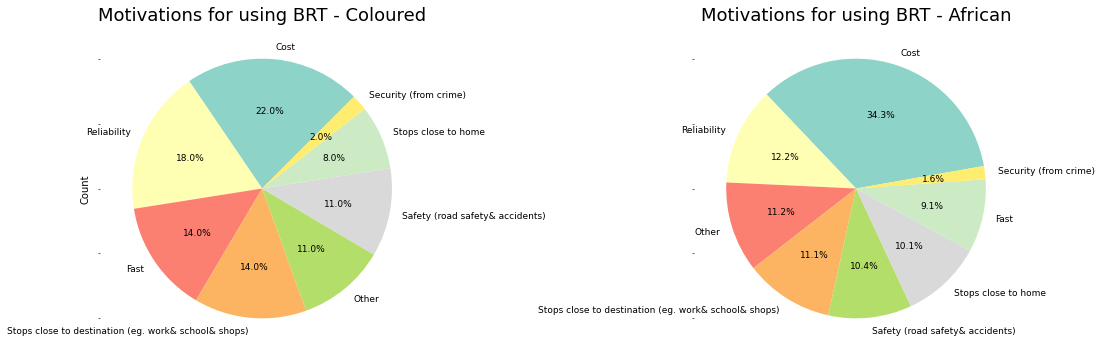

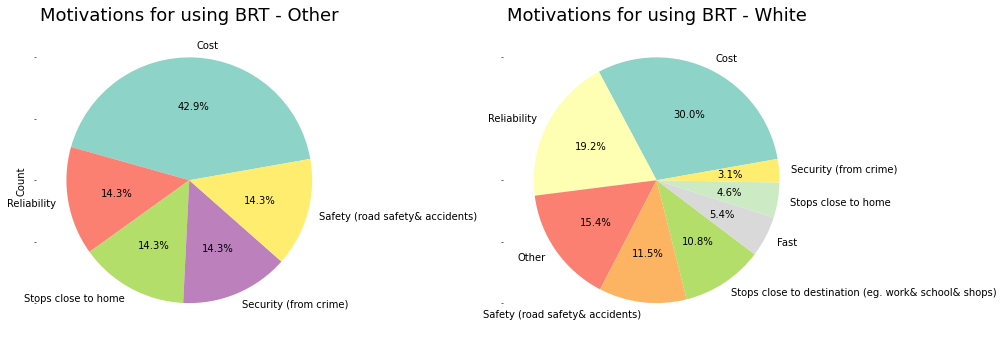

<Figure size 432x288 with 0 Axes>

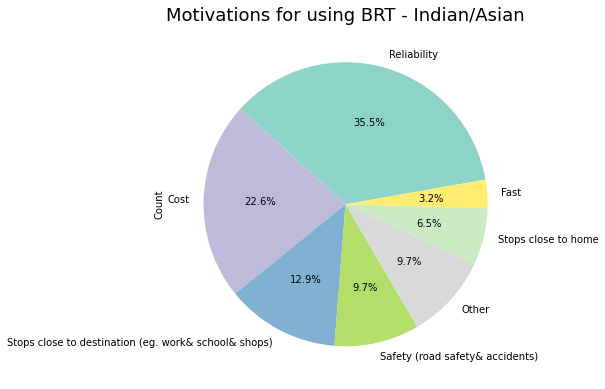

In [48]:
plt.figure(0)
# Create first chart here.

# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

why_BRT_coloured.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=45,
             shadow=False,
             cmap='Set3',
             labels=why_BRT_coloured['Q5_13_why_use_BRT'],
             legend=False, fontsize=9)
ax1.set_title("Motivations for using BRT - Coloured", fontsize = 18)

why_BRT_African.plot(kind='pie', y = 'Count', ax=ax2, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set3',
             labels=why_BRT_African['Q5_13_why_use_BRT'],
             legend=False, fontsize=9)
ax2.set_title("Motivations for using BRT - African", fontsize = 18)

fig.tight_layout()

plt.figure(1)

# Create second chart here.

# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(14, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

why_BRT_other.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set3',
             labels=why_BRT_other['Q5_13_why_use_BRT'],
             legend=False, fontsize=10)
ax1.set_title("Motivations for using BRT - Other", fontsize = 18)

why_BRT_white.plot(kind='pie', y = 'Count', ax=ax2, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set3',
             labels=why_BRT_white['Q5_13_why_use_BRT'],
             legend=False, fontsize=10)
ax2.set_title("Motivations for using BRT - White", fontsize = 18)
fig.tight_layout()
plt.figure(3)

# Create third chart here.
plt.figure(figsize=(14,12))
ax1 = plt.subplot(121, aspect = 'equal')
why_BRT_IndianAsian.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set3',
             labels=why_BRT_IndianAsian['Q5_13_why_use_BRT'],
             legend=False, fontsize=10)
ax1.set_title("Motivations for using BRT - Indian/Asian", fontsize = 18)
fig.tight_layout()
plt.show() #show all figures

I think this presentation is a *little* overwhelming but I can see the breakdown of responses per population group, so I will keep it. I discovered fig.tight_layout() which automatically sizes charts in a nice way

## Using Geopandas map plots

I will start by importing the necessary data libraries. I may want to create an isochrone map so I will also import networkx

In [49]:
# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

I first want to find wards in which respondents use BRT most days. In reviewing the data for BRT use, I see that 416 respondents who identify as African use BRT most days, more than any other group of respondents. I will therefore normalize Question Q511 BRT use for the "pop_group_African" dataframe to identify wards with the most respondents using BRT most days. I will then use the ward's location to create my map. By using crosstab(), I can see the responses of Q5_11_BRT_Freq by ward. I will save this information as a new variable African_BRT_use_freq

In [50]:
African_BRT_use_freq = pd.crosstab(index=pop_group_African['WardID'],
                        columns=pop_group_African['Q5_11_BRT_use'],
                       margins=True,
                       margins_name='Total Number')

# I want to ensure my code is successful
African_BRT_use_freq

Q5_11_BRT_use,A few times a month,Every few months,Most days,Never,Once or twice a week,Total Number
WardID,,,,,,
74201001,0,0,0,10,0,10
74201002,2,1,1,32,0,36
74201003,1,0,0,26,0,27
74201004,0,0,0,23,1,24
74201005,0,0,0,13,0,13
...,...,...,...,...,...,...
79900104,0,1,1,28,1,31
79900105,0,0,0,26,0,26
79900106,2,5,0,29,0,36


I want to see the percentage breakdown of "most days" BRT use by ward. To do so I will create a new column and populate it with normalized data to get the percent of the total value

In [51]:
African_BRT_use_freq['Percent Most days'] = African_BRT_use_freq['Most days']/African_BRT_use_freq['Total Number']*100

# I want to again make sure the code is successful

African_BRT_use_freq

Q5_11_BRT_use,A few times a month,Every few months,Most days,Never,Once or twice a week,Total Number,Percent Most days
WardID,,,,,,,
74201001,0,0,0,10,0,10,0.000000
74201002,2,1,1,32,0,36,2.777778
74201003,1,0,0,26,0,27,0.000000
74201004,0,0,0,23,1,24,0.000000
74201005,0,0,0,13,0,13,0.000000
...,...,...,...,...,...,...,...
79900104,0,1,1,28,1,31,3.225806
79900105,0,0,0,26,0,26,0.000000
79900106,2,5,0,29,0,36,0.000000


Now I can see the percentage of respondents who identify as African that use BRT most days. I want to see wards in which more than 50% of respondents use BRT most days. To do so I will query my dataset

In [52]:
African_BRT_use_freq[African_BRT_use_freq['Percent Most days'] >= 50]

Q5_11_BRT_use,A few times a month,Every few months,Most days,Never,Once or twice a week,Total Number,Percent Most days
WardID,,,,,,,


It looks like there are no wards in which more than 50% of respondents use BRT most days. I'll adjust to 25%

In [53]:
African_BRT_use_freq[African_BRT_use_freq['Percent Most days'] >= 25]

Q5_11_BRT_use,A few times a month,Every few months,Most days,Never,Once or twice a week,Total Number,Percent Most days
WardID,,,,,,,


Again, there aren't any wards in which more than 25% of respondents use BRT most days. I'll change to 15%

In [54]:
African_BRT_use_freq[African_BRT_use_freq['Percent Most days'] >= 15]

Q5_11_BRT_use,A few times a month,Every few months,Most days,Never,Once or twice a week,Total Number,Percent Most days
WardID,,,,,,,
79800060,11,6,10,32,1,60,16.666667
79800069,3,2,3,10,1,19,15.789474
79900107,3,2,7,30,2,44,15.909091


It looks like Ward "79800060" has 10 respondents that use BRT most days. I will use this ward to make a building type chart

In [55]:
# define my area of interest
address = 'Johannesburg Ward 60'

I looked up Ward "79800060" and it is called Johannesburg Ward 60 in Open Street Maps.

I want to get the OSM data that are tagged as "building" for my area of interest

In [56]:
osm_ward60 = ox.geometries_from_address(address,tags={'building':True},dist=1000)

I didn't get an error so I think it was successful. Now let's explore the data a bit

In [57]:
osm_ward60.shape

(553, 58)

I see I have 553 rows and 58 columns. I want some more information about the data

In [58]:
osm_ward60.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 553 entries, ('way', 26327903) to ('relation', 7771961)
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   geometry           553 non-null    geometry
 1   nodes              553 non-null    object  
 2   building           553 non-null    object  
 3   name               100 non-null    object  
 4   tourism            7 non-null      object  
 5   amenity            36 non-null     object  
 6   created_by         3 non-null      object  
 7   wheelchair         2 non-null      object  
 8   leisure            1 non-null      object  
 9   sport              1 non-null      object  
 10  addr:housenumber   25 non-null     object  
 11  addr:street        49 non-null     object  
 12  height             150 non-null    object  
 13  building:levels    108 non-null    object  
 14  roof:levels        4 non-null      object  
 15  office         

### Eliminate columns I don't want to use

In [59]:
## Columns to keep
columns_to_keep = ['geometry','building','height', 'bus']
osm_ward60 = osm_ward60[columns_to_keep]
osm_ward60.sample(10)

geometry  \
element_type osmid                                                          
way          762718388  POLYGON ((28.03730 -26.19429, 28.03795 -26.194...   
             849285648  POLYGON ((28.03140 -26.19393, 28.03137 -26.193...   
             763975690  POLYGON ((28.03673 -26.19677, 28.03688 -26.196...   
             58723492   POLYGON ((28.03871 -26.19258, 28.03913 -26.192...   
             661122408  POLYGON ((28.02849 -26.19038, 28.02850 -26.190...   
             739519838  POLYGON ((28.02977 -26.19201, 28.02910 -26.192...   
             763190067  POLYGON ((28.03327 -26.19592, 28.03351 -26.195...   
             762718391  POLYGON ((28.03616 -26.19447, 28.03622 -26.194...   
             763997306  POLYGON ((28.02790 -26.20131, 28.02784 -26.200...   
             762864957  POLYGON ((28.03988 -26.18671, 28.03989 -26.186...   

                       building height  bus  
element_type osmid                           
way          762718388      yes    NaN  NaN  
             849285648      yes    NaN  NaN  
             763975690     roof      5  NaN  
             58723492     hotel     60  NaN  
             661122408      yes    NaN  NaN  
             739519838      yes    NaN  NaN  
             763190067      yes      5  NaN  
             762718391      yes     30  NaN  
             763997306      yes    NaN  NaN  
             762864957      yes    NaN  NaN

## Map Plot of Ward 60

In [60]:
# Check the datatype we have

type(osm_ward60)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

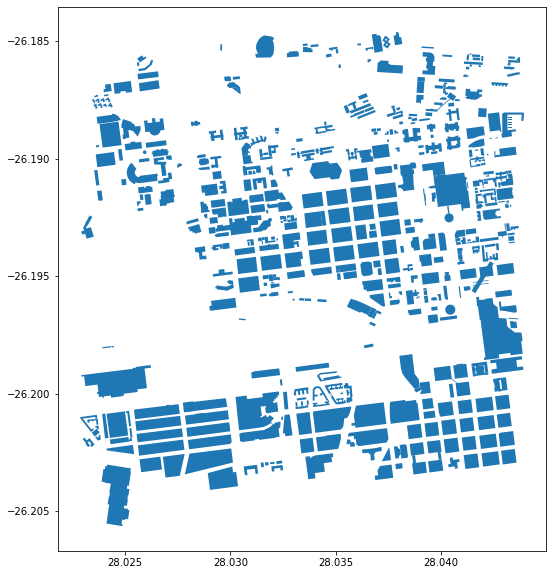

In [61]:
# plot entire dataset
osm_ward60.plot(figsize=(10,10))

### Color coding buildings

I will assign colors to the buildings in my map

<AxesSubplot:>

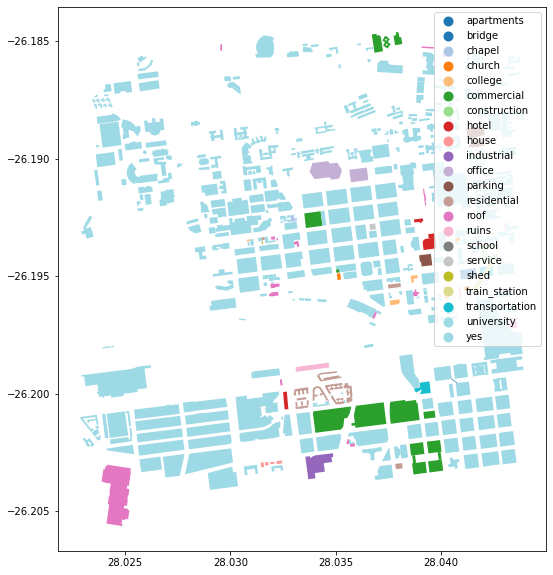

In [62]:
osm_ward60.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

There are a lot of building types in this dataset! I want to make sure each building has its own unique color, so I'm going to change the cmap

### Make it nice!

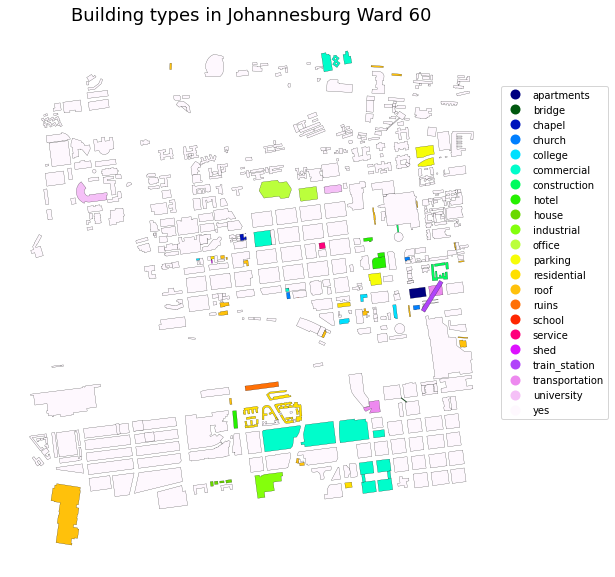

In [63]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm_ward60.plot(ax=ax,
         column='building',
                  cmap='gist_ncar',
                edgecolor='black',
                   linewidth=0.2,
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types in ' + address, fontsize = 18)

# get rid of the axis
ax.axis('off');

### Add a basemap

I want to add a basemap so I will use my contextily library, reproject my dataframe, and add a basemap!

In [64]:
#Reproject to web mercator

osm_ward60_web_mercator = osm_ward60.to_crs(epsg=3857)

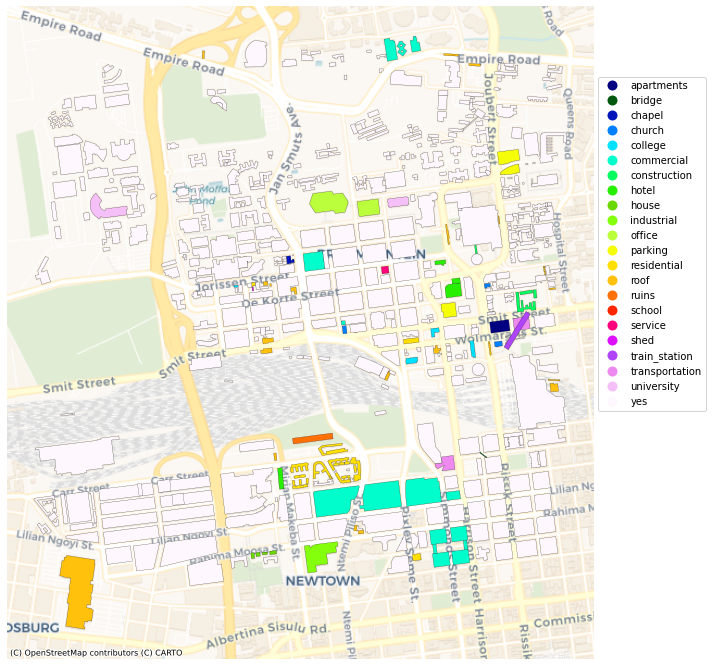

In [65]:
fig,ax = plt.subplots(figsize=(12,12))

osm_ward60_web_mercator.plot(ax=ax,
         column='building',
                  cmap='gist_ncar',
                edgecolor='black',
                   linewidth=0.2,
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# get rid of the axis
ax.axis('off');

# add my basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

Hmm...it's kind of hard to see when I add a basemap so I'm going to try and make the lines thicker and explore another basemap

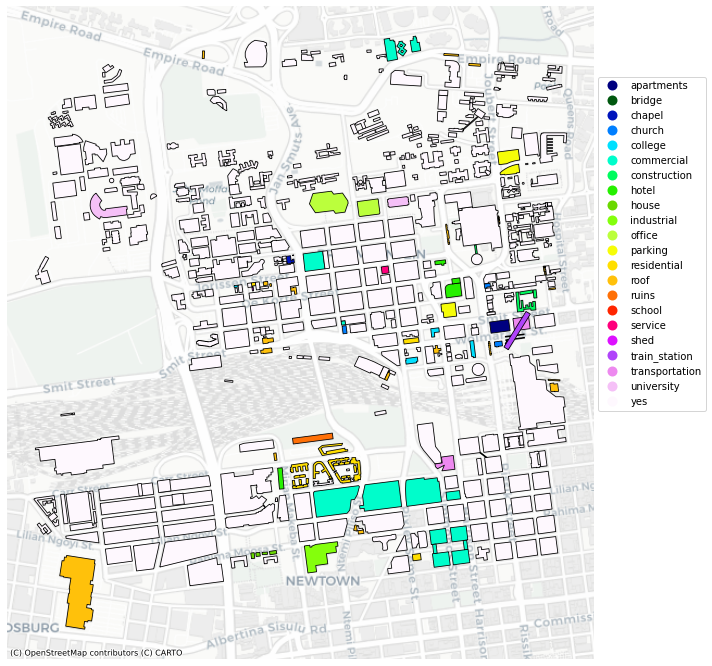

In [66]:
fig,ax = plt.subplots(figsize=(12,12))

osm_ward60_web_mercator.plot(ax=ax,
         column='building',
                  cmap='gist_ncar',
                edgecolor='black',
                   linewidth=0.8,
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# get rid of the axis
ax.axis('off');

# add basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

#### In this notebook I was able to explore and add some more information to our group project as well as practice some of the coding we learned last week.